In [41]:
from fer import Video
from fer import FER
import os
import sys
import pandas as pd

# input any video
# record a short video to test live
location_videofile = "trimmed8mins.mp4"

# Build the Face detection detector
face_detector = FER(mtcnn = False)
# Input the video for processing
input_video = Video(location_videofile)

# The Analyze() function will run analysis on every frame of the input video. 
# It will create a rectangular box around every image and show the emotion values next to that.
# Finally, the method will publish a new video that will have a box around the face of the human with live emotion values.
processing_data = input_video.analyze(face_detector, display=False)

2022-05-12 20:55:17.292913: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
INFO:fer:25.00 fps, 12023 frames, 480.92 seconds
INFO:fer:Making directories at output
INFO:fer:Deleted pre-existing output/trimmed8mins_output.mp4
100%|████████████████████████████████▉| 12013/12023 [30:15<00:01,  6.62frames/s]
INFO:fer:Completed analysis: saved to output/trimmed8mins_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 0%
INFO:fer:Compressing: 0%
INFO:fer:Compressing: 1%
INFO:fer:Compressing: 1%
INFO:fer:Compressing: 2%
INFO:fer:Compressing: 2%
INFO:fer:Compressing: 2%
INFO:fer:Compressing: 3%
INFO:fer:Compressing: 3%
INFO:fer:Compressing: 4%
INFO:fer:Compressing: 4%
INFO:fer:Compressing: 4%
INFO:fer:Compressing: 5%
INFO:fer:C

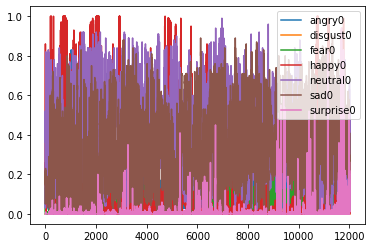

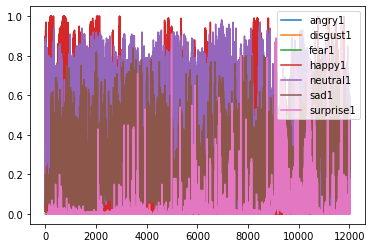

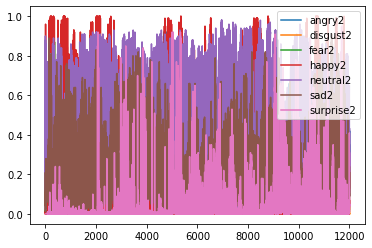

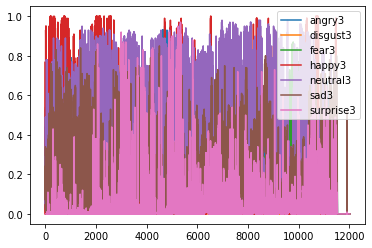

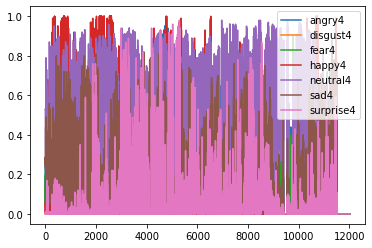

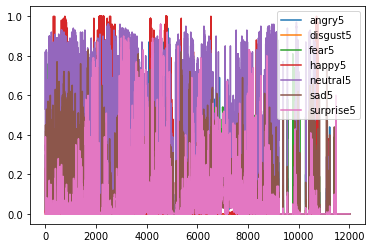

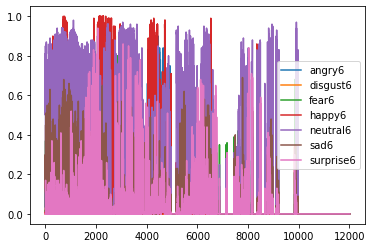

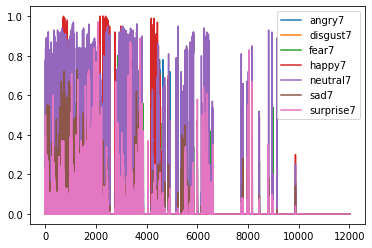

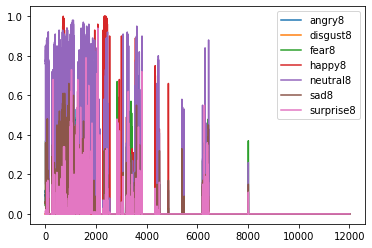

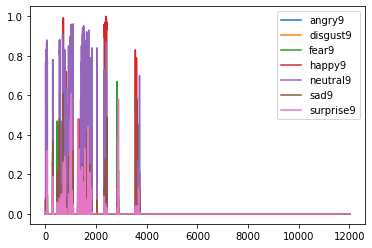

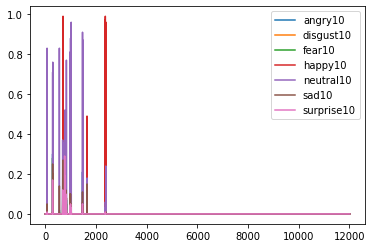

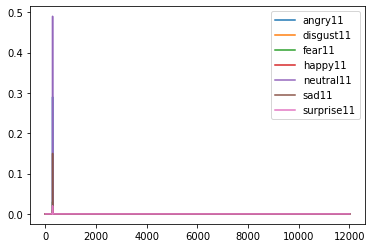

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv').fillna(value = 0)
total_rows = len(df.axes[1])
total_faces = int(total_rows/7)

for i in range(0, total_faces):
    fig, ax = plt.subplots()

    for column in df.columns[i::total_faces]:
        ax.plot(df[column], label = column)
    leg = ax.legend()
    plt.show()

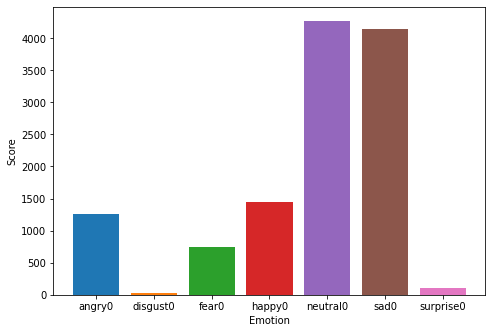

The dominant emotion is: neutral with a value of 4274.24


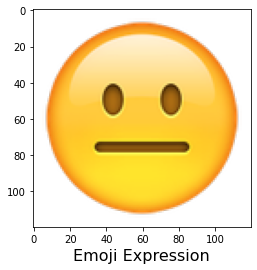

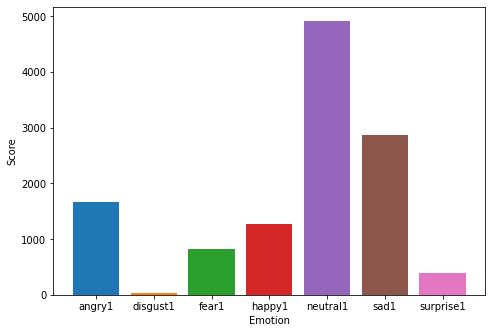

The dominant emotion is: neutral with a value of 4926.18


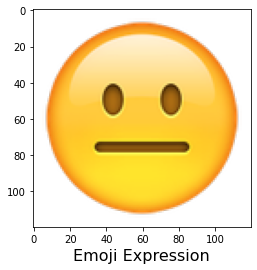

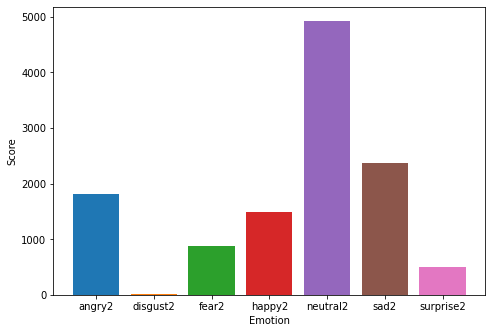

The dominant emotion is: neutral with a value of 4928.93


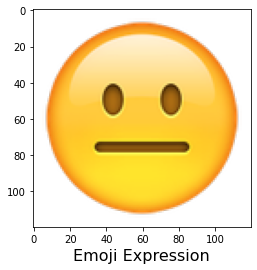

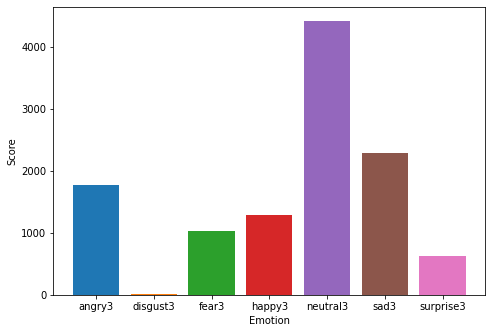

The dominant emotion is: neutral with a value of 4419.93


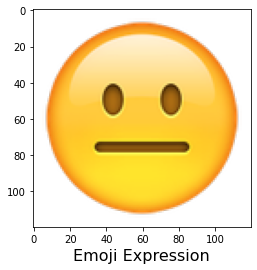

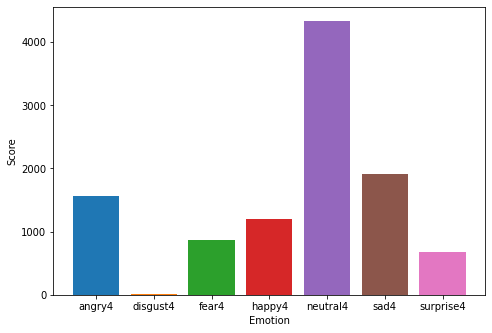

The dominant emotion is: neutral with a value of 4341.38


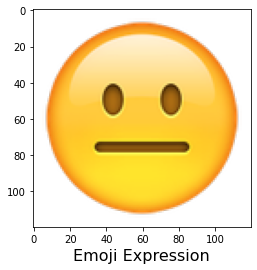

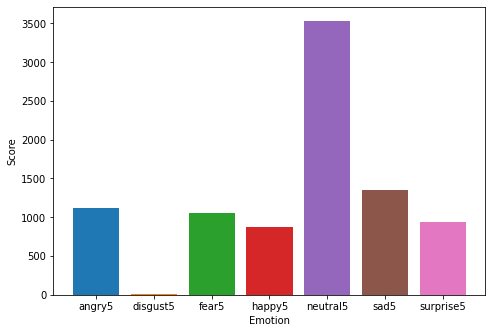

The dominant emotion is: neutral with a value of 3537.37


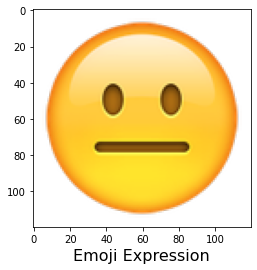

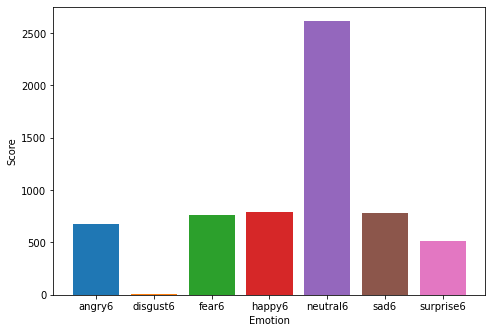

The dominant emotion is: neutral with a value of 2620.53


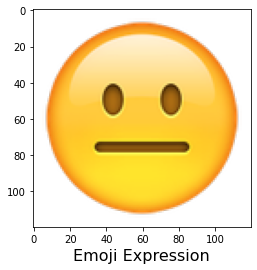

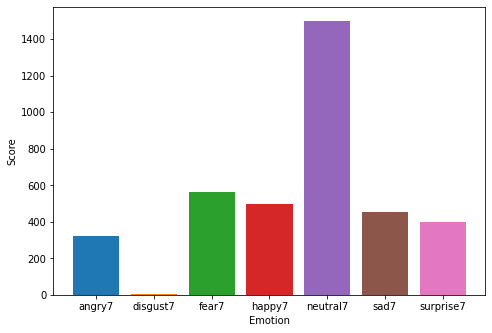

The dominant emotion is: neutral with a value of 1501.08


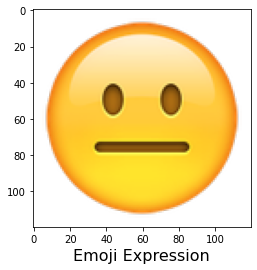

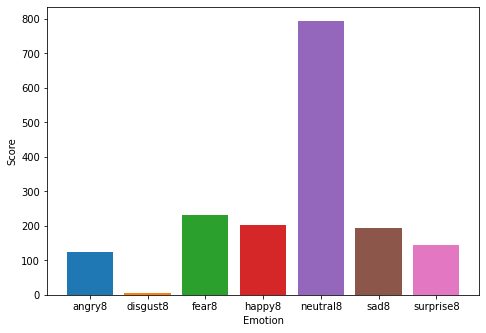

The dominant emotion is: neutral with a value of 794.83


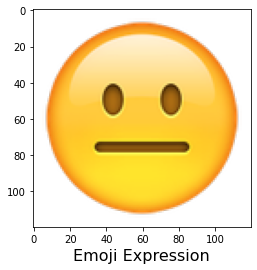

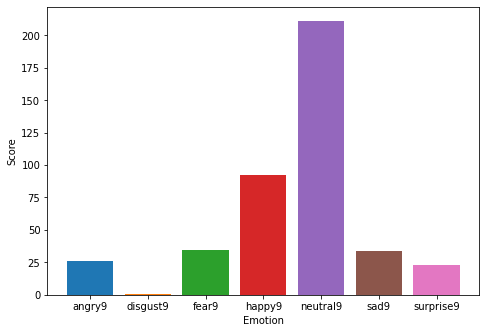

The dominant emotion is: neutral with a value of 211.33


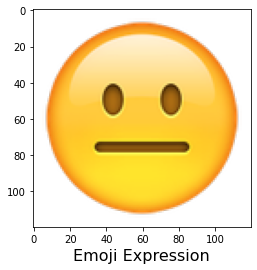

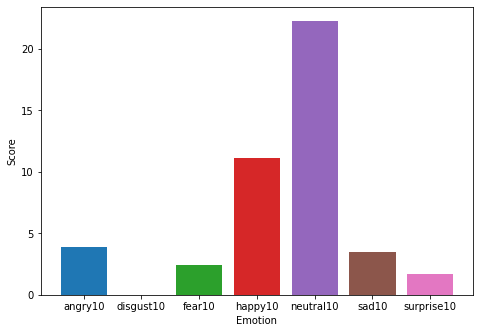

The dominant emotion is: neutral with a value of 22.29


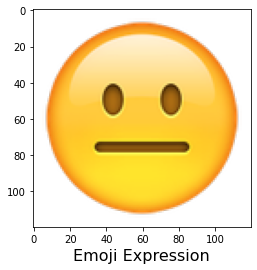

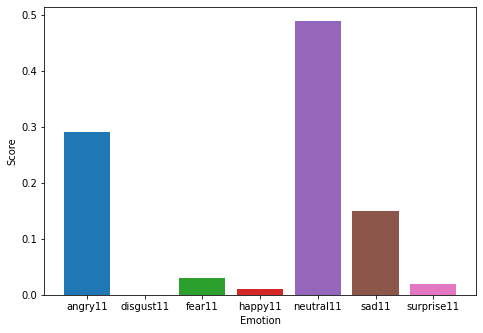

The dominant emotion is: neutral with a value of 0.49


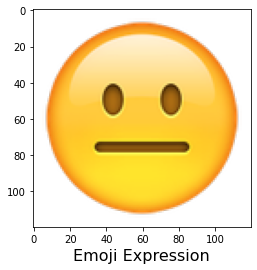

In [44]:
import transforms as transforms
from skimage import io

for i in range(0, total_faces):
    max_val = 0
    idx_max = 0
    max_emo = ""
    
    fig, ax = plt.subplots()
    ax = fig.add_axes([0,0,1,1])
    
    for column in df.columns[i::total_faces]:
        ax.bar(column,sum(df[column]))

        idx_max = sum(df[column])
        if idx_max > max_val:
            max_val = idx_max
            max_emo = column.strip('0123456789')
            
    #print(max_emo)
    if max_val == 0:
        continue
    else:   
        ax.set_ylabel('Score')
        ax.set_xlabel('Emotion')
        plt.show()
        print("The dominant emotion is:", max_emo, "with a value of %.2f" % max_val)
        emojis_img = io.imread('images/%s.png' % max_emo)
        plt.imshow(emojis_img)
        plt.xlabel('Emoji Expression', fontsize=16)
